In [2]:
import cv2
from matplotlib import pyplot as plt
from skimage import io,filters

In [23]:
def rgb(img):
    return cv2.cvtColor(img,cv2.COLOR_BGRA2RGB)

In [6]:
def gaussian_img(img, sigma=1):
    img_gaus = filters.gaussian(img, sigma)
    return img_gaus

In [4]:
img = cv2.imread('images/Osteosarcoma_01_8bit_salt_pepper_cropped.tif')

D:\venv\basic_use\lib\site-packages\skimage\_shared\utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


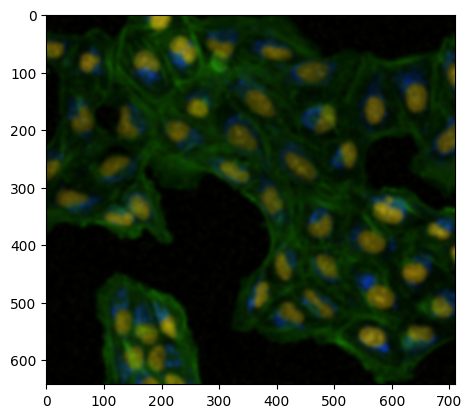

In [7]:
filtered = gaussian_img(img,3)
plt.imshow(filtered)

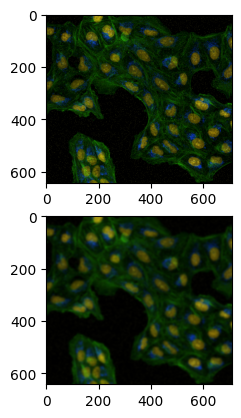

In [25]:
fig, ax = plt.subplots(2)
ax[0].imshow(img)
ax[1].imshow(filtered)

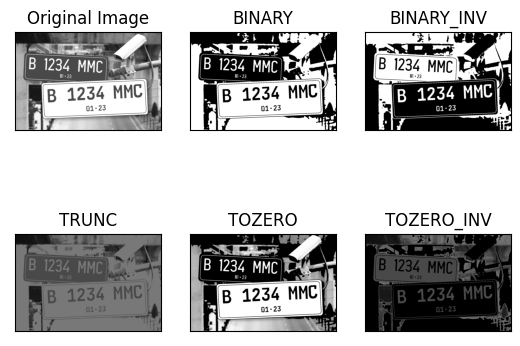

In [39]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('images/1633619976-plat-nomer-baru-revjpg.jpg',0)
thres_min = 120
thres_max = 255
ret,thresh1 = cv.threshold(img,thres_min,thres_max,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,thres_min,thres_max,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,thres_min,thres_max,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,thres_min,thres_max,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,thres_min,thres_max,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=thres_max)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

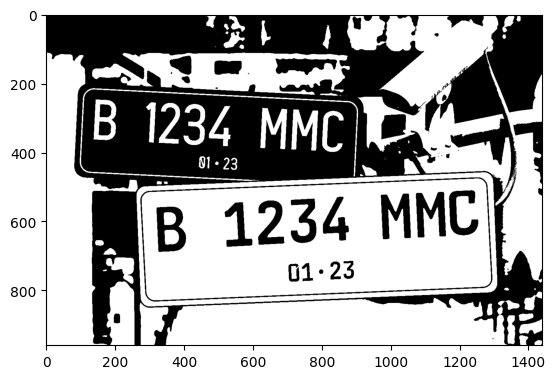

In [41]:
plt.imshow(rgb(thresh1))

In [42]:
import easyocr

In [46]:
reader = easyocr.Reader(['id'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [47]:
result = reader.readtext(thresh2)

In [48]:
print(result)

[([[138, 252], [210, 252], [210, 364], [138, 364]], 'B', 0.9445806621450039), ([[264, 237], [558, 237], [558, 402], [264, 402]], '1234', 0.9993242621421814), ([[605, 255], [888, 255], [888, 414], [605, 414]], 'MMC', 0.9982519679058638), ([[458, 410], [562, 410], [562, 458], [458, 458]], '1 . 23', 0.5251828182540831), ([[308, 506], [904, 506], [904, 700], [308, 700]], 'B 1234', 0.7460587601673478), ([[958, 495], [1277, 495], [1277, 670], [958, 670]], 'MMC', 0.9992216928365104), ([[691, 703], [907, 703], [907, 788], [691, 788]], '01. 23', 0.5777746893347664)]


In [49]:
ocr = reader.readtext(img)

In [50]:
print(ocr)

[([[136, 246], [210, 246], [210, 366], [136, 366]], 'B', 0.9994138146424945), ([[265, 237], [558, 237], [558, 400], [265, 400]], '1234', 0.5711588016609653), ([[603, 255], [886, 255], [886, 415], [603, 415]], 'MMC', 0.9989305281395534), ([[440, 410], [562, 410], [562, 458], [440, 458]], '01 . 23', 0.7113652931502545), ([[316, 548], [438, 548], [438, 694], [316, 694]], 'B', 0.9993419538042225), ([[494, 509], [901, 509], [901, 698], [494, 698]], '1234', 0.5733310549715893), ([[957, 492], [1277, 492], [1277, 672], [957, 672]], 'MMC', 0.8842478394508362), ([[693, 703], [907, 703], [907, 788], [693, 788]], '01. 23', 0.700760529377517)]
